Total images:  10864
Removed images:  7555
Remaining images:  3309
Total training images:  2647
Total validation images:  662
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 300 steps, validate for 200 steps
Epoch 1/10
300/300 [==============================] - 311s 1s/step - loss: 0.0667 - val_loss: 0.0590
Epoch 2/10
300/300 [==============================] - 283s 944ms/step - loss: 0.0536 - val_loss: 0.0486
Epoch 3/10
300/300 [==============================] - 288s 959ms/step - loss: 0.0494 - val_loss: 0.0513
Epoch 4/10
300/300 [==============================] - 285s 951ms/step - loss: 0.0470 - val_loss: 0.0506
Epoch 5/10
300/300 [==============================] - 285s 950ms/step - loss: 0.0460 - val_loss: 0.0425
Epoch 6/10
300/300 [==============================] - 287s 956ms/step - loss: 0.0440 - val_loss: 0.0407
Epoch 7/10
300/300 [==============================] - 285s 951ms/step - loss: 0.0413 - val_loss: 0.0389
Epoch 8/10
300/300 [==============================] - 2

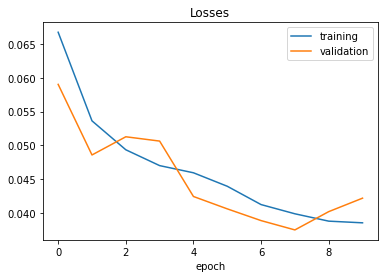

In [18]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

from utils import *
from sklearn.model_selection import train_test_split


#### step 1

path = 'IMG'
data = importDataInfo('')


#### step 2
data = balanceData(data, False)


#### step 3

imagesPath, steerings = loadData(path, data)
# print(imagesPath[0], steering[0])

#### step 4
xTrain, xVal, yTrain, yVal = train_test_split(imagesPath, steerings, test_size=0.2, random_state=5)
print('Total training images: ', xTrain.shape[0])
print('Total validation images: ', xVal.shape[0])


#### step 5



#### step 6


#### step 7


#### step 8

model = createModel()
# model.summary()

#### step 9

history = model.fit(batchGen(xTrain, yTrain, 100, 1), steps_per_epoch=300, epochs=10,
          validation_data=batchGen(xVal, yVal, 100, 0), validation_steps=200)


#### step 10

model.save('model1.h5')
print('Model saved')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Losses')
plt.xlabel('epoch')
plt.show()


In [ ]:
data.shape

In [ ]:
print('Setting UP')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import socketio
import eventlet
import numpy as np
from flask import Flask
from tensorflow.keras.models import load_model
# from keras.models import load_model
import base64
from io import BytesIO
from PIL import Image
import cv2
 
#### FOR REAL TIME COMMUNICATION BETWEEN CLIENT AND SERVER
sio = socketio.Server()
#### FLASK IS A MICRO WEB FRAMEWORK WRITTEN IN PYTHON
app = Flask(__name__)  # '__main__'
 
maxSpeed = 10
 
 
def preProcess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img
 
 
@sio.on('telemetry')
def telemetry(sid, data):
    speed = float(data['speed'])
    image = Image.open(BytesIO(base64.b64decode(data['image'])))
    image = np.asarray(image)
    image = preProcess(image)
    image = np.array([image])
    steering = float(model.predict(image))
    throttle = 1.0 - speed / maxSpeed
    print(f'{steering}, {throttle}, {speed}')
    sendControl(steering, throttle)
 
 
@sio.on('connect')
def connect(sid, environ):
    print('Connected')
    sendControl(0, 0)
 
 
def sendControl(steering, throttle):
    sio.emit('steer', data={
        'steering_angle': steering.__str__(),
        'throttle': throttle.__str__()
    })
 
 
if __name__ == '__main__':
    model = load_model('model1.h5')
    app = socketio.Middleware(sio, app)
    ### LISTEN TO PORT 4567
    eventlet.wsgi.server(eventlet.listen(('', 4567)), app)

Setting UP


(10860) wsgi starting up on http://0.0.0.0:4567
(10860) accepted ('127.0.0.1', 62958)


Connected
-0.07457063347101212, 0.562, 4.38
-0.07457063347101212, 0.562, 4.38
-0.044971223920583725, 0.3215, 6.785
-0.035110022872686386, 0.97228, 0.2772
-0.04338453337550163, 0.92491, 0.7509
-0.03025357611477375, 0.8420300000000001, 1.5797
-0.03360560163855553, 0.81322, 1.8678
-0.04457622393965721, 0.69159, 3.0841
-0.050290610641241074, 0.58307, 4.1693
-0.03464240953326225, 0.48548, 5.1452
-0.03967199847102165, 0.41093, 5.8907
-0.05534655228257179, 0.3348, 6.652
-0.04852673038840294, 0.2837799999999999, 7.1622
-0.022039251402020454, 0.22293000000000007, 7.7707
-0.036186736077070236, 0.19084999999999996, 8.0915
-0.027690822258591652, 0.14580000000000004, 8.542
-0.030951956287026405, 0.11580999999999997, 8.8419
-0.05156925693154335, 0.09486000000000006, 9.0514
-0.0505564920604229, 0.07904999999999995, 9.2095
-0.03831718489527702, 0.07082999999999995, 9.2917
-0.03151955083012581, 0.06648999999999994, 9.3351
-0.024713870137929916, 0.06488999999999989, 9.3511
0.008990282192826271, 0.065060

127.0.0.1 - - [05/Aug/2020 09:19:41] "GET /socket.io/?EIO=4&transport=websocket HTTP/1.1" 200 0 15.736811
